In [1]:
import numpy as np
import pandas as pd
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
from collections import Counter
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Final_NHANES.csv', dtype = object)
cols = ['Weight', 'Height', 'BMI', 'Pulse', 'TotChol', 'SleepHrsNight', 'Age', 'mortstat']
df = df[cols]
num_cols = ['Weight', 'Height', 'BMI', 'Pulse', 'TotChol', 'SleepHrsNight', 'Age']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df['mortstat'] = df['mortstat'].apply(lambda x: 1 if x=='Assumed Alive' else 0)
X = df.drop(columns=['mortstat'])
y= df['mortstat']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [3]:
xgb_full = xgboost.DMatrix(X_res, label=y_res)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

Series.base is deprecated and will be removed in a future version


In [4]:
# use validation set to choose # of trees
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:8.4253
[1000]	test-cox-nloglik:8.42592
[2000]	test-cox-nloglik:8.42639
[3000]	test-cox-nloglik:8.42684
[4000]	test-cox-nloglik:8.42728
[5000]	test-cox-nloglik:8.42771
[6000]	test-cox-nloglik:8.42817
[7000]	test-cox-nloglik:8.42859
[8000]	test-cox-nloglik:8.42904
[9000]	test-cox-nloglik:8.42951
[9999]	test-cox-nloglik:8.42996


In [5]:
# train final model on the full data set
params = {
    "eta": 0.002,
    "max_depth": 3, 
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:10.0272
[1000]	test-cox-nloglik:10.0277
[2000]	test-cox-nloglik:10.0284
[3000]	test-cox-nloglik:10.0292
[4000]	test-cox-nloglik:10.0301
[4999]	test-cox-nloglik:10.0311


In [6]:
X_test = pd.DataFrame([[78.00,166.8,28.00,68.00,3.44,7.05]], columns=['Weight','Height','BMI','Pulse','TotChol','SleepHrsNight'])

In [7]:
shap_values = shap.TreeExplainer(model).shap_values(X_res)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [8]:
shap_values_test = shap.TreeExplainer(model).shap_values(X_res)

In [74]:
shap_values.shape

(45268, 7)

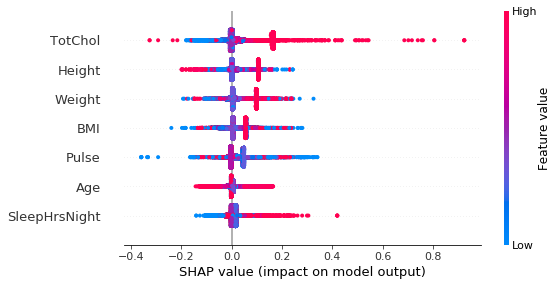

In [75]:
shap.summary_plot(shap_values, X_res)

invalid value encountered in true_divide
invalid value encountered in true_divide


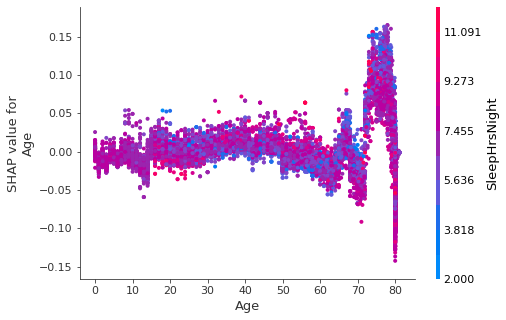

In [88]:
shap.dependence_plot("Age", shap_values, X_res, alpha = 1)

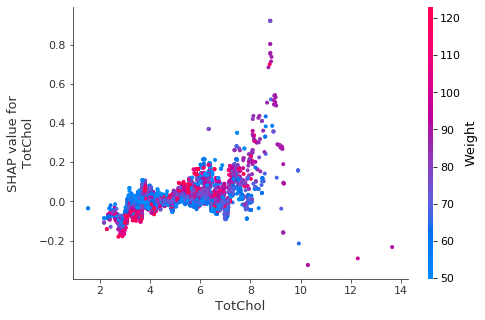

In [59]:
shap.dependence_plot("TotChol", shap_values, X_res)

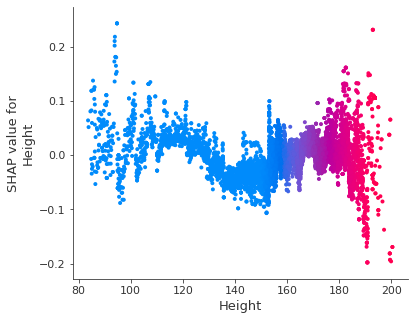

In [62]:
# setting show=False allows us to continue customizing the matplotlib plot before displaying it
shap.dependence_plot("Height", shap_values, X_res)

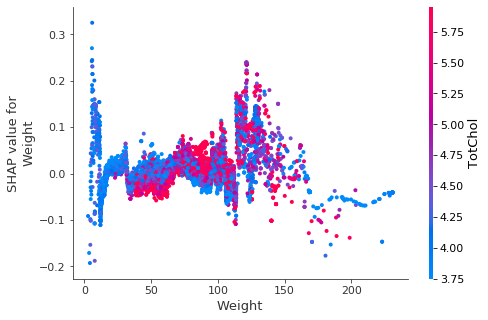

In [64]:
shap.dependence_plot("Weight", shap_values, X_res)

invalid value encountered in true_divide
invalid value encountered in true_divide


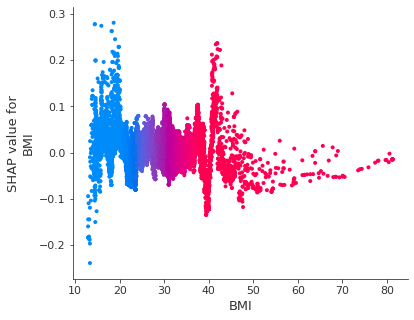

In [65]:
shap.dependence_plot("BMI", shap_values, X_res)

invalid value encountered in true_divide
invalid value encountered in true_divide


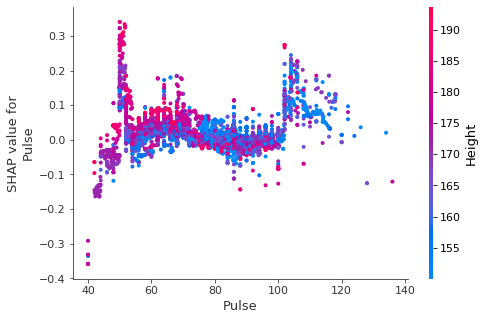

In [66]:
shap.dependence_plot("Pulse", shap_values, X_res)

invalid value encountered in true_divide
invalid value encountered in true_divide


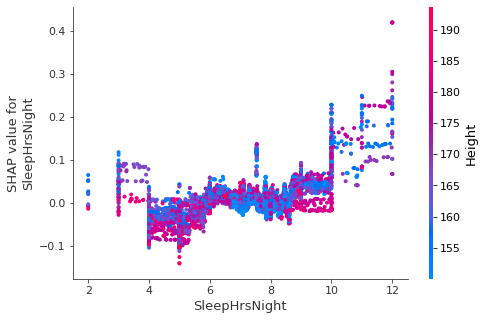

In [67]:
shap.dependence_plot("SleepHrsNight", shap_values, X_res)